Logistic Regression Evaluation Metrics:
      Metric    Score
0   Accuracy  83.7800
1  Precision  82.5000
2     Recall  86.8400
3   F1 Score  84.6200
4        MCC  67.5956


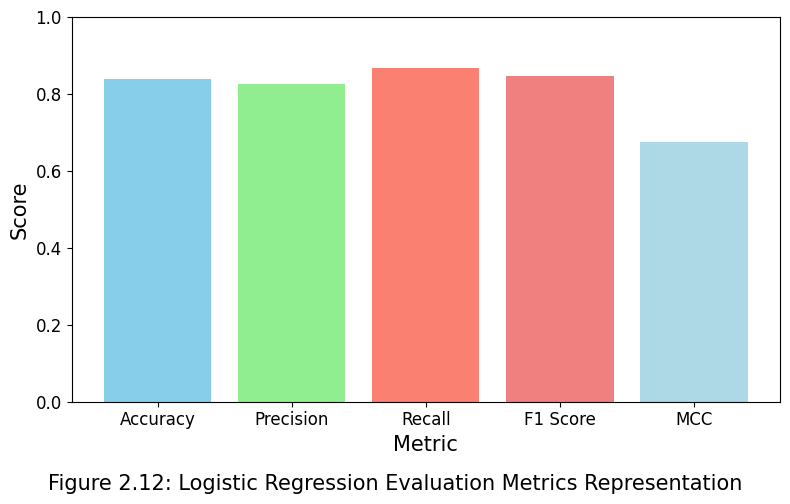

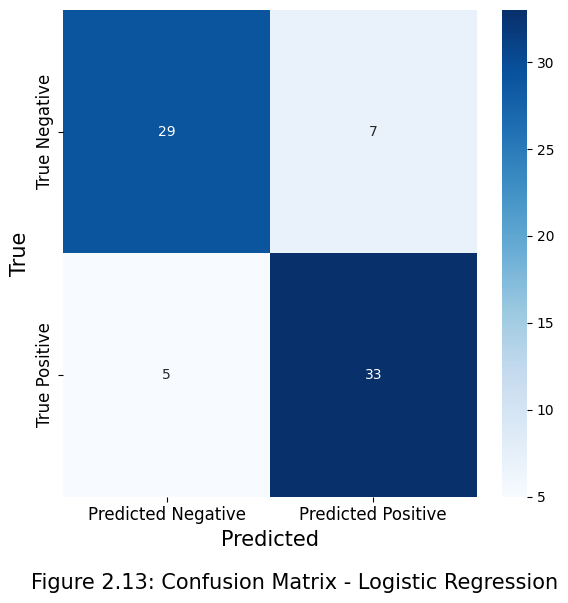

In [1]:
import requests
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, matthews_corrcoef
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns
# Import the requests module
import requests # This line was added to import the requests module.
url_string = 'https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data'


# Downloading Content From URL & Storing Into Local File
url_content = requests.get(url_string).content
with open('data.csv', 'wb') as data_file:
  data_file.write(url_content)


# Reading Data Into Pandas Dataframe
df = pd.read_csv('data.csv')

X = df.drop(['name', 'status'], axis=1)  # 'name' is an identifier, drop it
y = df['status']

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

# Apply SMOTE first
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# 4. Model Training with GridSearchCV for SVM
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=42)

# Hyperparameter Grid for Logistic Regression
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],   # Regularization strength
    'penalty': ['l2'],               # Only 'l2' penalty is supported by solver 'lbfgs'
    'solver': ['lbfgs']               # Optimizer
}

# GridSearchCV for Logistic Regression
grid_lr = GridSearchCV(LogisticRegression(random_state=42, max_iter=1000), param_grid_lr, cv=5, scoring='f1_macro', verbose=0)
grid_lr.fit(X_train, y_train)

# Best model
best_lr = grid_lr.best_estimator_

# Predictions
y_pred_lr = best_lr.predict(X_test)

# Evaluation Metrics
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr, average='binary')
recall_lr = recall_score(y_test, y_pred_lr, average='binary')
f1_lr = f1_score(y_test, y_pred_lr, average='binary')
mcc_lr = matthews_corrcoef(y_test, y_pred_lr)

# Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)

# Display results in table
results_lr = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'MCC'],
    'Score': [round(accuracy_lr * 100, 2), round(precision_lr * 100, 2), round(recall_lr * 100, 2), round(f1_lr * 100, 2), round(mcc_lr*100, 4)]
})

print("Logistic Regression Evaluation Metrics:")
print(results_lr)

# Bar chart
metrics_lr = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'MCC']
scores_lr = results_lr['Score'].values / 100

plt.figure(figsize=(8, 5))
plt.bar(metrics_lr, scores_lr, color=['skyblue', 'lightgreen', 'salmon', 'lightcoral', 'lightblue'])
# plt.title('Logistic Regression Evaluation Metrics')
plt.xlabel('Metric', fontsize=15, color='black')
plt.ylabel('Score', fontsize=15,color='black')

plt.ylim(0, 1)
plt.tick_params(axis='both', colors='black', labelsize=12)
plt.figtext(0.5, 0.01, 'Figure 2.12: Logistic Regression Evaluation Metrics Representation',
            wrap=True, horizontalalignment='center', fontsize=15)
plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.savefig('lr_metrics.png', dpi=300)
plt.show()

# Confusion Matrix Plot
plt.figure(figsize=(6, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['True Negative', 'True Positive'])
plt.xlabel('Predicted', fontsize=15, fontname='Times New Roman', color='black')
plt.ylabel('True', fontsize=15, fontname='Times New Roman', color='black')
plt.tick_params(axis='both', colors='black', labelsize=12)
# plt.title('Confusion Matrix - Random Forest')

plt.figtext(0.5, 0.01, 'Figure 2.13: Confusion Matrix - Logistic Regression',
            wrap=True, horizontalalignment='center', fontsize=15)

plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.savefig('confusion_matrix_lr1.png', dpi=300)
plt.show()
